In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [5]:
BRK = wb.DataReader('BRK-A', data_source='yahoo', start='1995-1-1')

In [6]:
BRK.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,20500.0,20550.0,20250.0,20400.0,27000,20400.0
1995-01-04,20400.0,20550.0,20350.0,20550.0,13000,20550.0
1995-01-05,20500.0,20500.0,20500.0,20500.0,14000,20500.0
1995-01-06,20550.0,20600.0,20550.0,20600.0,4000,20600.0
1995-01-09,20700.0,21200.0,20700.0,21200.0,21000,21200.0


In [7]:
BRK.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-05-05,250530.0,250530.0,249100.0,250000.0,400,250000.0
2017-05-08,250000.0,250000.0,246401.0,247160.0,300,247160.0
2017-05-09,247750.0,247940.0,245000.0,246000.0,400,246000.0
2017-05-10,245800.0,245850.0,245100.0,245850.0,400,245850.0
2017-05-11,245770.0,245770.0,243770.0,245240.0,200,245240.0


# Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*Adj Close* is "Adjusted close price", adjusted by dividends and other events at the close of the market at that date.

In [10]:
BRK['simple_return'] = (BRK['Adj Close'] / BRK['Adj Close'].shift(1)) - 1
print(BRK['simple_return'])

Date
1995-01-03         NaN
1995-01-04    0.007353
1995-01-05   -0.002433
1995-01-06    0.004878
1995-01-09    0.029126
1995-01-10    0.023585
1995-01-11   -0.004608
1995-01-12    0.020833
1995-01-13    0.011338
1995-01-16    0.049327
1995-01-17    0.014957
1995-01-18   -0.025263
1995-01-19    0.008639
1995-01-20    0.000000
1995-01-23   -0.012848
1995-01-24    0.000000
1995-01-25    0.017354
1995-01-26    0.004264
1995-01-27    0.006369
1995-01-30    0.008439
1995-01-31    0.029289
1995-02-01    0.010163
1995-02-02   -0.015895
1995-02-03   -0.006338
1995-02-06    0.006173
1995-02-07    0.006135
1995-02-08    0.009146
1995-02-09   -0.011078
1995-02-10   -0.030550
1995-02-13   -0.054622
                ...   
2017-03-30    0.008164
2017-03-31   -0.007744
2017-04-03    0.003002
2017-04-04   -0.000200
2017-04-05   -0.006586
2017-04-06    0.005585
2017-04-07   -0.003296
2017-04-10    0.003744
2017-04-11   -0.007181
2017-04-12   -0.002699
2017-04-13   -0.011818
2017-04-17    0.006939
2017-0

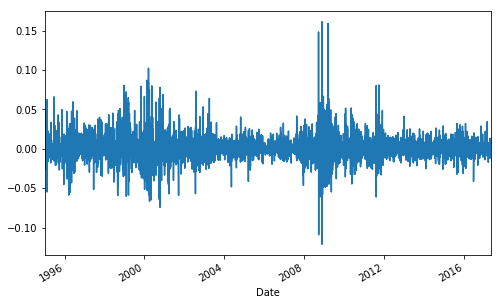

In [11]:
BRK['simple_return'].plot(figsize=(8,5))
plt.show()

In [12]:
avg_returns_d = BRK['simple_return'].mean()
avg_returns_d

0.00054959836826352199

In [13]:
avg_returns_a = avg_returns_d * 250 # multiply by the average number of business days per year
print(str(round(avg_returns_a, 5) * 100) + ' %')

13.74 %


# Logarithmic Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [14]:
BRK.head()

,Open,High,Low,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,20500.0,20550.0,20250.0,20400.0,27000,20400.0,NaN
1995-01-04,20400.0,20550.0,20350.0,20550.0,13000,20550.0,0.007353
1995-01-05,20500.0,20500.0,20500.0,20500.0,14000,20500.0,-0.002433
1995-01-06,20550.0,20600.0,20550.0,20600.0,4000,20600.0,0.004878
1995-01-09,20700.0,21200.0,20700.0,21200.0,21000,21200.0,0.029126


In [16]:
BRK['log_return'] = np.log(BRK['Adj Close'] / BRK['Adj Close'].shift(1))
print(BRK['log_return'])

Date
1995-01-03         NaN
1995-01-04    0.007326
1995-01-05   -0.002436
1995-01-06    0.004866
1995-01-09    0.028710
1995-01-10    0.023311
1995-01-11   -0.004619
1995-01-12    0.020619
1995-01-13    0.011274
1995-01-16    0.048149
1995-01-17    0.014847
1995-01-18   -0.025588
1995-01-19    0.008602
1995-01-20    0.000000
1995-01-23   -0.012931
1995-01-24    0.000000
1995-01-25    0.017205
1995-01-26    0.004255
1995-01-27    0.006349
1995-01-30    0.008403
1995-01-31    0.028868
1995-02-01    0.010111
1995-02-02   -0.016023
1995-02-03   -0.006358
1995-02-06    0.006154
1995-02-07    0.006116
1995-02-08    0.009105
1995-02-09   -0.011139
1995-02-10   -0.031026
1995-02-13   -0.056170
                ...   
2017-03-30    0.008131
2017-03-31   -0.007774
2017-04-03    0.002997
2017-04-04   -0.000200
2017-04-05   -0.006607
2017-04-06    0.005569
2017-04-07   -0.003302
2017-04-10    0.003737
2017-04-11   -0.007206
2017-04-12   -0.002703
2017-04-13   -0.011888
2017-04-17    0.006915
2017-0

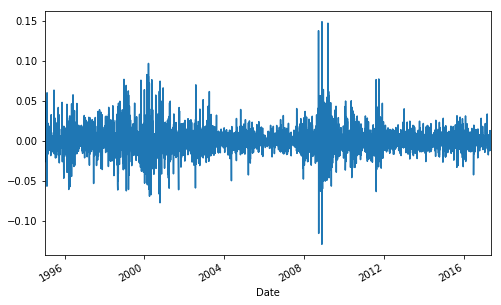

In [17]:
BRK['log_return'].plot(figsize=(8, 5))
plt.show()

In [18]:
log_return_d = BRK['log_return'].mean()
log_return_d

0.00044176628567140045

In [19]:
log_return_a = BRK['log_return'].mean() * 250
log_return_a

0.11044157141785012

In [21]:
print(str(round(log_return_a, 5) * 100) + ' %')

11.044 %
